In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d0=pd.read_csv('MNIST_Train.csv')

In [3]:
d0.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l=d0['label']
d=d0.drop('label',axis=1)

In [5]:
l

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [6]:
print(d0.shape)
print(l.shape)

(42000, 785)
(42000,)


In [7]:
d

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


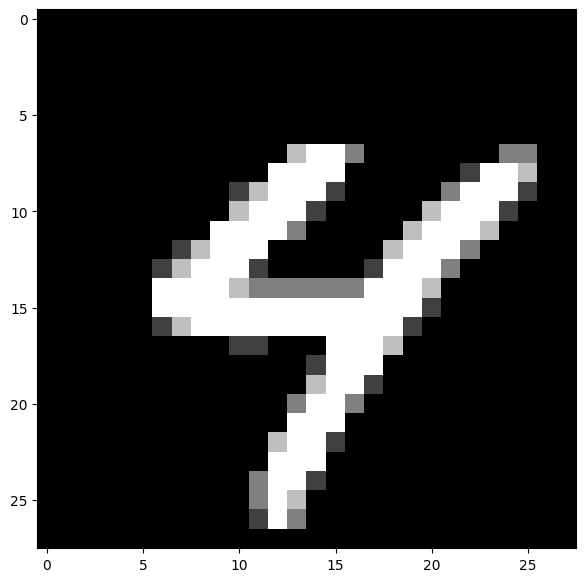

4


In [8]:
plt.figure(figsize=(7,7))
idx=250

grid_data=d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

print(l[idx])

In [9]:
labels=l.head(15000)
data=d.head(15000)

In [10]:
data.shape

(15000, 784)

In [11]:
from sklearn.preprocessing import StandardScaler as sc

In [12]:
stdt=sc().fit_transform(data)

In [13]:
print(stdt)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
smdt=stdt

In [15]:
cvmx=np.matmul(smdt.T,smdt)

In [16]:
from scipy.linalg import eigh

In [17]:
values,vectors=eigh(cvmx,subset_by_index=(782,783))

In [18]:
vectors

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [19]:
vectors=vectors.T

In [20]:
vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
import matplotlib.pyplot as plt

In [22]:
nc=np.matmul(vectors,smdt.T)

In [23]:
nc=np.vstack((nc,labels)).T

In [24]:
df=pd.DataFrame(data=nc,columns=('1st_Principal','2nd_Principal','Label'))

In [25]:
import seaborn as sns

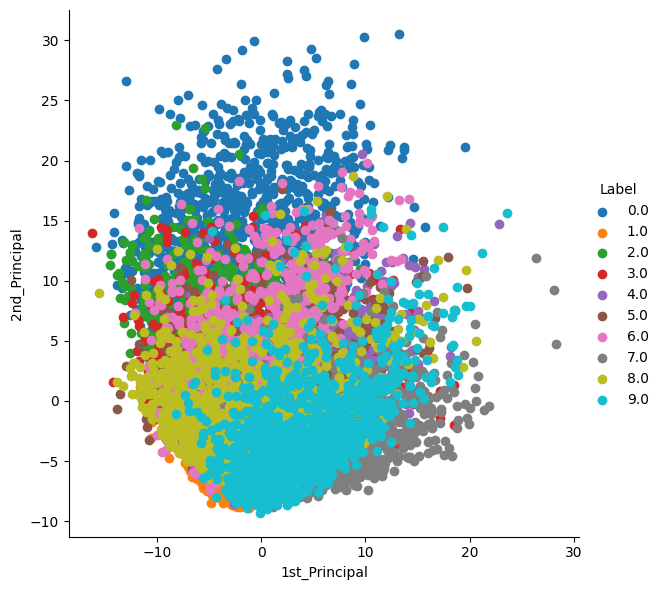

In [26]:
sns.FacetGrid(df,hue='Label',height=6)\
   .map(plt.scatter,'1st_Principal','2nd_Principal')\
   .add_legend()
plt.show()

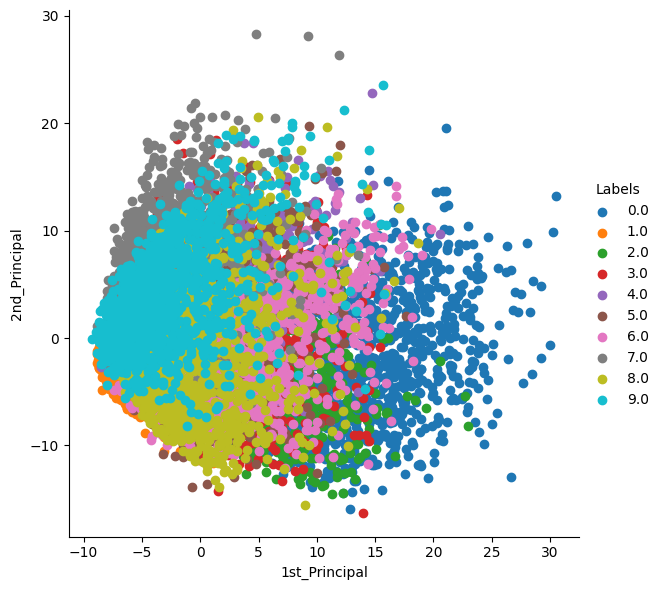

In [27]:
from sklearn import decomposition
pca=decomposition.PCA()

pca.n_components=2
pca_data=pca.fit_transform(smdt)

pca_data=np.vstack((pca_data.T,labels)).T
pca_df=pd.DataFrame(data=pca_data,columns=('1st_Principal','2nd_Principal','Labels'))

sns.FacetGrid(pca_df,hue='Labels',height=6)\
   .map(plt.scatter,'1st_Principal','2nd_Principal')\
   .add_legend()
plt.show()

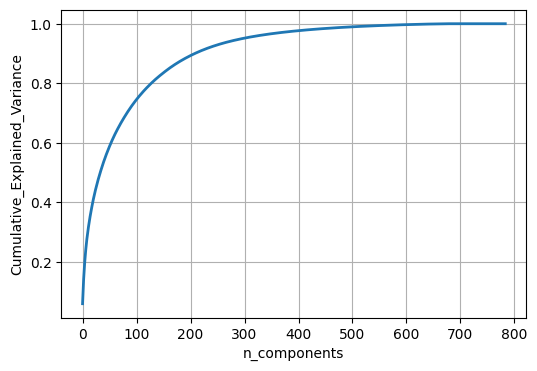

In [34]:
pca.n_components=784
pca_d=pca.fit_transform(smdt)

pve=pca.explained_variance_ratio_

cve=np.cumsum(pve)

plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cve,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_Explained_Variance')
plt.show()

In [35]:
from sklearn.manifold import TSNE

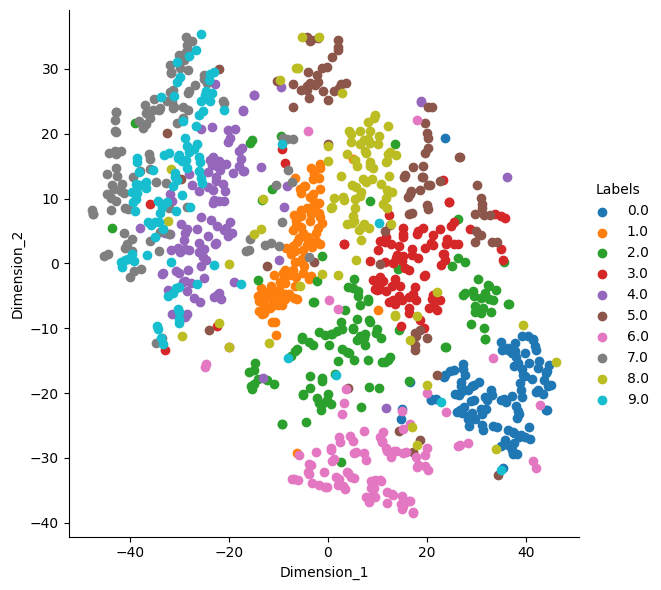

In [37]:
data_1000=stdt[0:1000,:]
labels_1000=labels[0:1000]

model=TSNE(n_components=2,random_state=0)

tsne_data=model.fit_transform(data_1000)

tsne_data=np.vstack((tsne_data.T,labels_1000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('Dimension_1','Dimension_2','Labels'))

sns.FacetGrid(tsne_df,hue='Labels',height=6)\
   .map(plt.scatter,'Dimension_1','Dimension_2')\
   .add_legend();
plt.show()

In [ ]:
%matplotlib inline
import 